In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(dpi=1200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<Figure size 7200x4800 with 0 Axes>

In [2]:
#import the dataset with pandas
df = pd.read_excel('salary_data_states.xlsx')

In [3]:
df

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",SOFTWARE ENGINEER,BLOOMINGTON,None,Nothing,n,...,"Software Developers, Applications",Illinois,IL,Unknown,y,H-1B,0.00,62171.00,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,Assistant Professor of Marketing,SAN FRANCISCO,Doctorate,marketing,n,...,"Business Teachers, Postsecondary",California,CA,94132.0,n,greencard,0.00,91440.00,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,SPECIAL EDUCATION TEACHER,LOS ANGELES,None,Nothing,n,...,"Special Education Teachers, Kindergarten and E...",California,CA,Unknown,y,H-1B,0.00,49470.00,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,SCIENCE TEACHER,HARLINGEN CISD,None,Nothing,n,...,"Biological Science Teachers, Postsecondary",Texas,TX,Unknown,y,H-1B,0.00,43800.00,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,SENIOR SOFTWARE ENGINEER,PORTLAND,None,Nothing,n,...,"Software Developers, Systems Software",Oregon,OR,Unknown,y,E-3 Australian,0.00,170000.00,software engineer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167273,I-200-12241-209885,certified-withdrawn,8/28/2012,6/6/2013,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",MIDDLE SCHOOL TEACHERS,SAIPAN,None,Nothing,n,...,"Middle School Teachers, Except Special and Car...",Northern Mariana Islands,MP,Unknown,y,H-1B,10504.00,11648.00,teacher,167357
167274,I-200-11305-143547,denied,11/1/2011,11/3/2011,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",PRESCHOOL TEACHER,SAIPAN,None,Nothing,n,...,"Preschool Teachers, Except Special Education",Northern Mariana Islands,MP,Unknown,y,H-1B,10504.00,10920.00,teacher,167358
167275,I-200-11313-833007,certified,11/9/2011,11/16/2011,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",TEACHER,SAIPAN,None,Nothing,n,...,"Teachers and Instructors, All Other*",Northern Mariana Islands,MP,Unknown,y,H-1B,10504.00,10920.00,teacher,167359
167276,I-200-11312-798611,denied,11/8/2011,11/15/2011,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",PRESCHOOL TEACHER,SAIPAN,None,Nothing,n,...,"Preschool Teachers, Except Special Education",Northern Mariana Islands,MP,Unknown,y,H-1B,10504.00,10608.00,teacher,167360


In [4]:
df = df.dropna(subset=['PREVAILING_WAGE_PER_YEAR'])

In [5]:
# Question 3
# How do offered salaries compare to the prevailing wage?

#prev_mean = df.PREVAILING_WAGE_PER_YEAR.mean()
#real_mean = df.PAID_WAGE_PER_YEAR.mean()
#print("Preveiling wage per year mean =",round(prev_mean, 4),"$","\nReal wage per year mean =" ,round(real_mean, 4),"$")

df1_prev_wage = df.groupby(['JOB_TITLE_SUBGROUP'])['PREVAILING_WAGE_PER_YEAR'].mean()
df1_prev_wage

JOB_TITLE_SUBGROUP
assistant professor      58794.26
attorney                106648.37
business analyst         64731.36
data analyst             62737.92
data scientist           90545.58
management consultant    77507.45
software engineer        84040.37
teacher                  42342.62
Name: PREVAILING_WAGE_PER_YEAR, dtype: float64

In [6]:
df2_paid_wage = df.groupby(['JOB_TITLE_SUBGROUP'])['PAID_WAGE_PER_YEAR'].mean()
df2_paid_wage

JOB_TITLE_SUBGROUP
assistant professor      94876.71
attorney                146413.60
business analyst         71300.08
data analyst             70030.08
data scientist          108021.04
management consultant   108251.33
software engineer        92505.30
teacher                  46039.99
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [7]:
# 3.1 Are there job sub-categories that tend to get over-paid or under-paid?
df3_wage_dif = df2_paid_wage.subtract(df1_prev_wage, axis = 0)
df3_wage_dif_sorted = df3_wage_dif.sort_values(axis=0, ascending=False)
df3_wage_dif_sorted

JOB_TITLE_SUBGROUP
attorney                39765.22
assistant professor     36082.45
management consultant   30743.88
data scientist          17475.46
software engineer        8464.93
data analyst             7292.16
business analyst         6568.72
teacher                  3697.37
dtype: float64

In [1]:
figure_3_wage_dif = df3_wage_dif_sorted
fig, ax = plt.subplots(figsize=(10,4))
plt.bar(df3_wage_dif_sorted.index, df3_wage_dif_sorted)
ax.set_ylabel("Wage Difference")
ax.tick_params(axis='x', labelrotation=75)

plt.savefig('question3_1.png', bbox_inches='tight', dpi=1200)

NameError: name 'df3_wage_dif_sorted' is not defined

In [9]:
# 3.2 Are there companies that tend to over-pay or under-pay?
df_5_paid_wage_employer = df.groupby(['EMPLOYER_NAME'])['PAID_WAGE_PER_YEAR'].mean()
df_5_prev_wage_employer = df.groupby(['EMPLOYER_NAME'])['PREVAILING_WAGE_PER_YEAR'].mean()

df_5_wage_diff_employer = df_5_paid_wage_employer.subtract(df_5_prev_wage_employer, axis = 0)
df_5_wage_diff_employer_asc = df_5_wage_diff_employer.sort_values(axis=0).head(10)
df_5_wage_diff_employer_asc

EMPLOYER_NAME
BROOKLYN COLLEGE OF THE CITY UNIVERSITY OF NEW YORK   -99859.76
STONY BROOK PSYCHIATRIC ASSOCIATES, UFPC              -74703.20
DEPT. OF MEDICINE MEDICAL SERVICE GROUP @ SUNY - H    -64876.24
RESEARCH FOUNDATION FOR SUNY                          -59783.88
UC PHYSICIANS, INC.                                   -56307.68
THE RESEARCH FOUNDATION OF SUNY                       -52973.96
THE CITY UNIVERSITY OF NEW YORK (CITY COLLEGE)        -42059.16
UNIVERSITY OF VIRGINIA HEALTH SERVICES FOUNDATION     -39491.92
SALUS UNIVERSITY                                      -28798.64
WASHINGTON BAPTIST UNIVERSITY, INC.                   -25362.48
dtype: float64

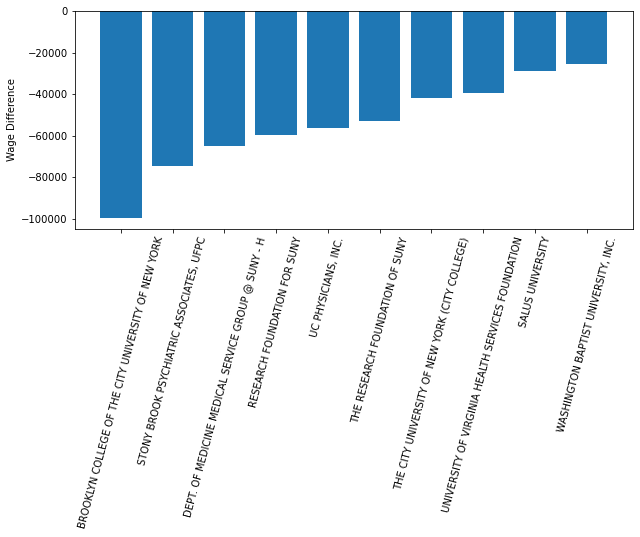

In [10]:
figure_5_wage_diff_employer_asc = df_5_wage_diff_employer_asc
fig, ax = plt.subplots(figsize=(10,4))
plt.bar(figure_5_wage_diff_employer_asc.index, figure_5_wage_diff_employer_asc)
ax.set_ylabel("Wage Difference")
ax.tick_params(axis='x', labelrotation=75)
plt.savefig('question3_2_asc.png', bbox_inches='tight', dpi=1200)

In [11]:
df_5_wage_diff_employer_desc = df_5_wage_diff_employer.sort_values(axis=0, ascending=False).head(10)
df_5_wage_diff_employer_desc

EMPLOYER_NAME
HUGHES HUBBARD & REED LLP                            2207183.75
THE UNIVERSITY OF TEXAS SYSTEM ADMINISTRATION         608202.00
SIGMATEK SYSTEMS, LLC                                 544402.00
RUFUS-ISAACS, ACLAND & GRANTHAM, LLP                  500385.60
AUTISTIC TREATMENT CENTER A/K/A AUTISM TREATMENT C    497200.00
CO-CREATION PARTNERS, INC.                            479117.60
ALIASWIRE, INC.                                       442554.00
DIXIE STATE COLLEGE OF UTAH                           425693.50
INSIDE, INC.                                          406963.00
LOAD DYNAMIX, INC.                                    398396.00
dtype: float64

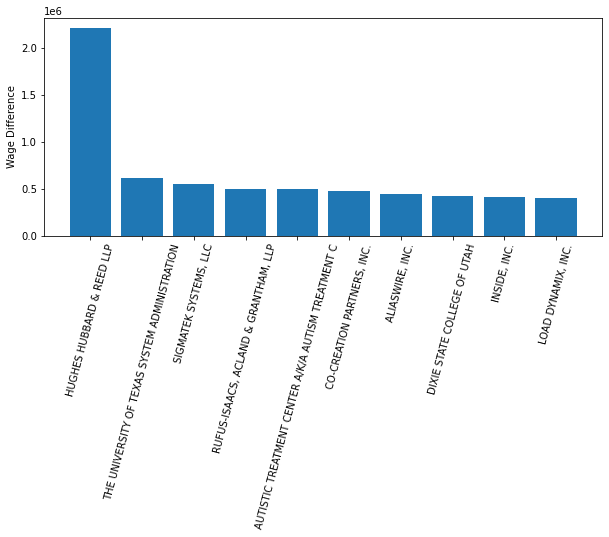

In [12]:
figure_5_wage_diff_employer_desc = df_5_wage_diff_employer_desc
fig, ax = plt.subplots(figsize=(10,4))
plt.bar(figure_5_wage_diff_employer_desc.index, figure_5_wage_diff_employer_desc)
ax.set_ylabel("Wage Difference")
ax.tick_params(axis='x', labelrotation=75)
plt.savefig('question3_2_desc.png', bbox_inches='tight', dpi=1200)

In [13]:
# 3.3 Will the answer change if I take standard of living into account?
# referred data: https://taxfoundation.org/real-value-100-state-2019/
# Top 5 States worth of $100
# Mississippi $116.69,
# Arkansas $115.61,
# Alabama $115.34,
# West Virginia $114.94,
# Kentucky $113.77,

In [14]:
df_6_paid_wage_state = df.groupby(['WORK_STATE'])['PAID_WAGE_PER_YEAR'].mean()
df_6_prev_wage_state = df.groupby(['WORK_STATE'])['PREVAILING_WAGE_PER_YEAR'].mean()

df_6_wage_diff_state = df_6_paid_wage_state.subtract(df_6_prev_wage_state, axis = 0)
df_6_wage_diff_state_desc = df_6_wage_diff_state.sort_values(axis=0,ascending=False).head(5)
df_6_wage_diff_state_desc

WORK_STATE
West Virginia   55253.00
Mississippi     33413.18
Arkansas        25347.88
Alabama         21493.09
Kentucky        21384.56
dtype: float64

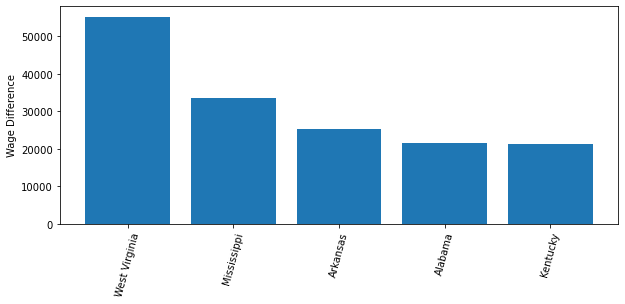

In [15]:
figure_6_wage_diff_state_desc = df_6_wage_diff_state_desc
fig, ax = plt.subplots(figsize=(10,4))
plt.bar(figure_6_wage_diff_state_desc.index, figure_6_wage_diff_state_desc)
ax.set_ylabel("Wage Difference")
ax.tick_params(axis='x', labelrotation=75)
plt.savefig('question3_3.png', bbox_inches='tight', dpi=1200)

In [16]:
# Top 5 States worth of $100
# Mississippi $116.69,
# Arkansas $115.61,
# Alabama $115.34,
# West Virginia $114.94,
# Kentucky $113.77,
df_6_wage_diff_state_desc

West_Virginia = 55253.00*1.1494
Mississippi = 33413.18*1.1669
Arkansas = 25347.88*1.1561
Alabama = 21493.09*1.1534
Kentucky = 21384.56*1.1377

standard_living_data = {
    "West Virginia": [West_Virginia],
    "Mississippi": [Mississippi],
    "Arkansas": [Arkansas],
    "Alabama": [Alabama],
    "Kentucky": [Kentucky],
}
standard_living_dataframe = pd.DataFrame(standard_living_data)

print(standard_living_dataframe)

   West Virginia  Mississippi  Arkansas  Alabama  Kentucky
0       63507.80     38989.84  29304.68 24790.13  24329.21
